In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
ruta_archivo = 'BALLOTAGE 2023/NIVEL NACIONAL/ballotage2023_resultados_x_seccion.csv'

In [4]:
data = pd.read_csv(ruta_archivo, sep=',')

In [5]:
data.head(2)

,Unnamed: 0,id,seccion,agrupacion_ganadora,LA LIBERTAD AVANZA_perc,UNION POR LA PATRIA_perc,LA LIBERTAD AVANZA_votos,UNION POR LA PATRIA_votos,Participacion,electores,votantes,BLANCO_perc,IMPUGNADO_perc,NULO_perc,BLANCO_votos,IMPUGNADO_votos
0,0,BUENOS AIRES_25 DE MAYO,"25 De Mayo, Buenos Aires",LA LIBERTAD AVANZA,63.72,36.28,14530,8272,73.87,31823,23508,1.44,0.06,1.50,339,15
1,1,BUENOS AIRES_9 DE JULIO,"9 De Julio, Buenos Aires",LA LIBERTAD AVANZA,63.97,36.03,20408,11495,76.24,43181,32921,1.72,0.03,1.35,566,9


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528 entries, 0 to 527
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 528 non-null    int64  
 1   id                         528 non-null    object 
 2   seccion                    528 non-null    object 
 3   agrupacion_ganadora        520 non-null    object 
 4   LA LIBERTAD AVANZA_perc    528 non-null    float64
 5   UNION POR LA PATRIA_perc   528 non-null    float64
 6   LA LIBERTAD AVANZA_votos   528 non-null    int64  
 7   UNION POR LA PATRIA_votos  528 non-null    int64  
 8   Participacion              528 non-null    float64
 9   electores                  528 non-null    int64  
 10  votantes                   528 non-null    int64  
 11  BLANCO_perc                528 non-null    object 
 12  IMPUGNADO_perc             528 non-null    float64
 13  NULO_perc                  528 non-null    float64

In [6]:
data.describe

<bound method NDFrame.describe of      Unnamed: 0                                   id  \
0             0              BUENOS AIRES_25 DE MAYO   
1             1              BUENOS AIRES_9 DE JULIO   
2             2           BUENOS AIRES_ADOLFO ALSINA   
3             3  BUENOS AIRES_ADOLFO GONZALES CHAVES   
4             4                 BUENOS AIRES_ALBERTI   
..          ...                                  ...   
523         523                       TUCUMAN_SIMOCA   
524         524               TUCUMAN_TAFI DEL VALLE   
525         525                   TUCUMAN_TAFI VIEJO   
526         526                      TUCUMAN_TRANCAS   
527         527                  TUCUMAN_YERBA BUENA   

                                  seccion  agrupacion_ganadora  \
0                25 De Mayo, Buenos Aires   LA LIBERTAD AVANZA   
1                9 De Julio, Buenos Aires   LA LIBERTAD AVANZA   
2             Adolfo Alsina, Buenos Aires   LA LIBERTAD AVANZA   
3    Adolfo Gonzales Chaves, 

In [7]:
print(data.columns)

Index(['Unnamed: 0', 'id', 'seccion', 'agrupacion_ganadora',
       'LA LIBERTAD AVANZA_perc', 'UNION POR LA PATRIA_perc',
       'LA LIBERTAD AVANZA_votos', 'UNION POR LA PATRIA_votos',
       'Participacion', 'electores', 'votantes', 'BLANCO_perc',
       'IMPUGNADO_perc', 'NULO_perc', 'BLANCO_votos', 'IMPUGNADO_votos'],
      dtype='object')


In [8]:
votos_libertad_avanza = data['LA LIBERTAD AVANZA_votos'].sum()
votos_union_patria = data['UNION POR LA PATRIA_votos'].sum()

# Mostrar los resultados
print("Votos para 'LA LIBERTAD AVANZA':", votos_libertad_avanza)
print("Votos para 'UNION POR LA PATRIA':", votos_union_patria)

Votos para 'LA LIBERTAD AVANZA': 14476462
Votos para 'UNION POR LA PATRIA': 11516142


In [9]:
# Conteo de valores únicos, columna votos por partido)
print(data['agrupacion_ganadora'].value_counts())

agrupacion_ganadora
LA LIBERTAD AVANZA     352
UNION POR LA PATRIA    168
Name: count, dtype: int64


In [10]:
# Verificar valores nulos y sumarlos por columna
print(data.isnull().sum())

Unnamed: 0                   0
id                           0
seccion                      0
agrupacion_ganadora          8
LA LIBERTAD AVANZA_perc      0
UNION POR LA PATRIA_perc     0
LA LIBERTAD AVANZA_votos     0
UNION POR LA PATRIA_votos    0
Participacion                0
electores                    0
votantes                     0
BLANCO_perc                  0
IMPUGNADO_perc               0
NULO_perc                    0
BLANCO_votos                 0
IMPUGNADO_votos              0
dtype: int64


In [11]:
# Seleccionar solo columnas numéricas para calcular la correlación
columnas_numericas = data.select_dtypes(include=['float64', 'int64'])
correlaciones = columnas_numericas.corr()
print(correlaciones)

                           Unnamed: 0  LA LIBERTAD AVANZA_perc  \
Unnamed: 0                   1.000000                -0.148500   
LA LIBERTAD AVANZA_perc     -0.148500                 1.000000   
UNION POR LA PATRIA_perc     0.149745                -0.610120   
LA LIBERTAD AVANZA_votos    -0.081964                 0.210380   
UNION POR LA PATRIA_votos   -0.145384                -0.002772   
Participacion                0.018177                 0.448318   
electores                   -0.118036                 0.121034   
votantes                    -0.115454                 0.120640   
IMPUGNADO_perc               0.101621                 0.025545   
NULO_perc                   -0.000649                 0.497922   
BLANCO_votos                -0.185650                 0.128287   
IMPUGNADO_votos             -0.100909                 0.075575   

                           UNION POR LA PATRIA_perc  LA LIBERTAD AVANZA_votos  \
Unnamed: 0                                 0.149745         

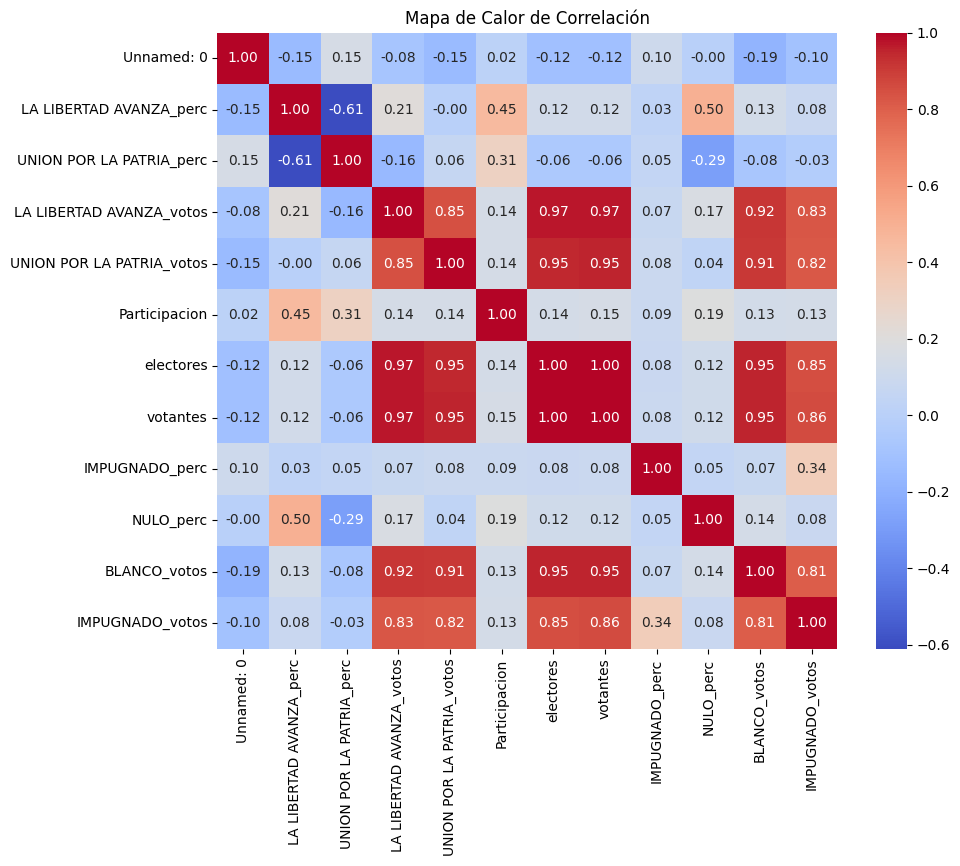

In [12]:
# Seleccionar solo columnas numéricas para calcular la correlación
columnas_numericas = data.select_dtypes(include=['float64', 'int64'])
correlaciones = columnas_numericas.corr()

# Crear un mapa de calor de las correlaciones
plt.figure(figsize=(10, 8))
sns.heatmap(correlaciones, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor de Correlación')
plt.show()

In [13]:
data.columns

Index(['Unnamed: 0', 'id', 'seccion', 'agrupacion_ganadora',
       'LA LIBERTAD AVANZA_perc', 'UNION POR LA PATRIA_perc',
       'LA LIBERTAD AVANZA_votos', 'UNION POR LA PATRIA_votos',
       'Participacion', 'electores', 'votantes', 'BLANCO_perc',
       'IMPUGNADO_perc', 'NULO_perc', 'BLANCO_votos', 'IMPUGNADO_votos'],
      dtype='object')

In [14]:
# Obtener el conteo de votos por partido
conteo_votosLA = data['LA LIBERTAD AVANZA_votos'].sum()

In [15]:
conteo_votosUP = data['UNION POR LA PATRIA_votos'].sum()

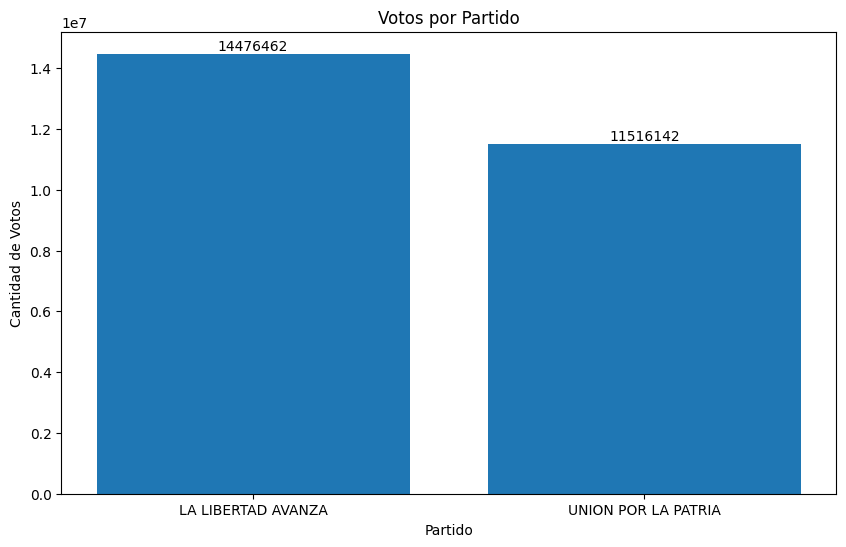

In [16]:
# Obtener el conteo de votos por partido
conteo_votosLA = data['LA LIBERTAD AVANZA_votos'].sum()
conteo_votosUP = data['UNION POR LA PATRIA_votos'].sum()

# Crear el gráfico de barras
partidos = ['LA LIBERTAD AVANZA', 'UNION POR LA PATRIA']
votos = [conteo_votosLA, conteo_votosUP]

plt.figure(figsize=(10, 6))
bars = plt.bar(partidos, votos)

# Agregar etiquetas con el número exacto de votos encima de cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f"{int(yval)}", ha='center', va='bottom')

plt.title('Votos por Partido')
plt.xlabel('Partido')
plt.ylabel('Cantidad de Votos')
plt.show()

In [17]:
# Sumar los votos por sección para cada agrupación
votos_por_seccion = data.groupby('seccion')[['LA LIBERTAD AVANZA_votos', 'UNION POR LA PATRIA_votos']].sum()

In [18]:

# Ordenar por el total de votos de mayor a menor
votos_por_seccion['Total de Votos'] = votos_por_seccion.sum(axis=1)
votos_por_seccion = votos_por_seccion.sort_values(by='Total de Votos', ascending=False)

In [19]:
# Mostrar la tabla de votos por sección para cada agrupación
print(votos_por_seccion)

                                  LA LIBERTAD AVANZA_votos  \
seccion                                                      
Capital, Cordoba                                    614786   
La Matanza, Buenos Aires                            303672   
Rosario, Santa Fe                                   434442   
La Plata, Buenos Aires                              208515   
General Pueyrredon, Buenos Aires                    223162   
...                                                    ...   
Susques, Jujuy                                           0   
Santa Victoria, Salta                                    0   
Curaco, La Pampa                                         0   
Florentino Ameghino, Chubut                              0   
Gastre, Chubut                                           0   

                                  UNION POR LA PATRIA_votos  Total de Votos  
seccion                                                                      
Capital, Cordoba                     

In [20]:
# Exportar la tabla de votos por sección a un archivo CSV
votos_por_seccion.to_csv('votos_por_seccion.csv', index=True)  # Nombre del archivo y exportar el índice


In [ ]:
# Dividir la columna 'id' en dos columnas usando '_' como separador
data[['Provincia', 'Localidad']] = data['id'].str.split('_', n=1, expand=True)

# Mostrar el DataFrame resultante con las columnas separadas
print(data)

In [28]:
# Agrupar por 'Provincia' y sumar los votos de cada lista por separado
suma_votos_lista_1 = data.groupby('Provincia')['UNION POR LA PATRIA_votos'].sum().reset_index()
suma_votos_lista_2 = data.groupby('Provincia')['LA LIBERTAD AVANZA_votos'].sum().reset_index()


In [31]:
# Guardar los resultados en archivos CSV
suma_votos_lista_1.to_csv('suma_votos_lista_1.csv', index=False)
suma_votos_lista_2.to_csv('suma_votos_lista_2.csv', index=False)
